In [15]:
%matplotlib inline
import pandas as pd
from IPython.display import display
import matplotlib
#matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sqlite3
import os

# check for latex installation

if os.system("latex 2> /dev/null") == 0:
    sns.set(rc={"xtick.bottom" : True, "ytick.left" : True, 'text.usetex' : True})
else:
    sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] =(20,10)
pd.options.display.max_rows = 2000
plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.family'] = 'cmu serif'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

sns.set_context('paper', font_scale=3.5)

conn = sqlite3.connect("../demo-db.sqlite")

In [16]:
def get_pareto_frontier(df, x, y, split):
    # removes all rows that don't lie on the pareto frontier
    to_plot = df.sort_values(y,ascending=False).reset_index(drop=True)
    d = {} # store last x values
    drop_list = []
    for algo in set(df[split]):
        d[algo] = 0
    for i in range(len(to_plot)):
        x_ = to_plot.iloc[i][x]
        y_ = to_plot.iloc[i][y]
        algo = to_plot.iloc[i][split]
        if x_ > d[algo]:
            d[algo] = x_
        else:
            drop_list.append(i)
    to_plot.drop(drop_list, inplace=True)
        
    return to_plot

In [17]:
df = pd.read_sql_query("select * from results;", conn);

In [18]:
df.head()

,sha,git_rev,hostname,date,dataset,dataset_version,algorithm,algorithm_version,parameters,running_time_ns,seed,experiment_file,components,version_brute_force,version_filter,version_distance,version_storage,recall
0,0702656c39dcba408c32ecc0a8212613e3097105abdd66...,8e726d6,mac610540,2020-06-17T20:07:23.274350,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,806606135,4132,experiments/sketch-test.yaml,filter_i16_aligned_simple,1,1,1,1,0.77
1,07665e592aa8500db392b9349399f582072f60596c63bf...,*,mac610540,2020-06-16T19:59:32.203882,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,5265550200,4132,experiments/sketch-test.yaml,,0,0,0,0,0.98
2,12de901cdbc127ed6c65cdef11ecf2ec9716800612c20d...,8e726d6,mac610540,2020-06-17T20:10:52.904599,glove-100-angular,1,bruteforce,4,method=avx2;storage=i16_aligned;filter=true;re...,1978103581,4132,experiments/sketch-test.yaml,filter_i16_aligned_avx2,1,1,1,1,0.99
3,12ef80d4ec89da9201b53dde2371bc2ec127a169dcccf3...,*,mac610540,2020-06-16T19:59:45.431642,glove-100-angular,1,bruteforce,4,method=avx2;storage=i16_aligned;filter=true;re...,352407400,4132,experiments/sketch-test.yaml,,0,0,0,0,0.74
4,186584be655f3db5dae7e37707668a09a796f028e7dede...,8e726d6,mac610540,2020-06-17T20:04:08.171234,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,3148125634,4132,experiments/sketch-test.yaml,filter_float_aligned_simple,1,1,1,1,0.99


In [19]:
p = r'method=(?P<method>\w*);storage=(?P<storage>\w*);(filter=(?P<filter>\w*);recall=(?P<recall_wish>[\d.]*).*)?'

df[['method', 'storage', 'filter', 'recall_wish']] = df.parameters.str.extract(p, expand=True)[['method', 'storage', 'filter', 'recall_wish']]
df = df[df.method.notnull()]
df

,sha,git_rev,hostname,date,dataset,dataset_version,algorithm,algorithm_version,parameters,running_time_ns,...,components,version_brute_force,version_filter,version_distance,version_storage,recall,method,storage,filter,recall_wish
0,0702656c39dcba408c32ecc0a8212613e3097105abdd66...,8e726d6,mac610540,2020-06-17T20:07:23.274350,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,806606135,...,filter_i16_aligned_simple,1,1,1,1,0.77,simple,i16_aligned,true,0.1
1,07665e592aa8500db392b9349399f582072f60596c63bf...,*,mac610540,2020-06-16T19:59:32.203882,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,5265550200,...,,0,0,0,0,0.98,simple,i16_aligned,true,0.99
2,12de901cdbc127ed6c65cdef11ecf2ec9716800612c20d...,8e726d6,mac610540,2020-06-17T20:10:52.904599,glove-100-angular,1,bruteforce,4,method=avx2;storage=i16_aligned;filter=true;re...,1978103581,...,filter_i16_aligned_avx2,1,1,1,1,0.99,avx2,i16_aligned,true,0.99
3,12ef80d4ec89da9201b53dde2371bc2ec127a169dcccf3...,*,mac610540,2020-06-16T19:59:45.431642,glove-100-angular,1,bruteforce,4,method=avx2;storage=i16_aligned;filter=true;re...,352407400,...,,0,0,0,0,0.74,avx2,i16_aligned,true,0.001
4,186584be655f3db5dae7e37707668a09a796f028e7dede...,8e726d6,mac610540,2020-06-17T20:04:08.171234,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,3148125634,...,filter_float_aligned_simple,1,1,1,1,0.99,simple,float_aligned,true,0.9
5,1f3cd75fab5c5f2e971fc582d6abb6167745af743b64ef...,c724bac*,mac610540,2020-06-18T11:23:39.350817,glove-100-angular,1,bruteforce,4,method=avx2;storage=float_aligned;filter=true;...,585485700,...,filter_float_aligned_avx2,1,1,3,1,0.75,avx2,float_aligned,true,0.001
6,1fc7e7b5b63fb3abe43b97428bd03bd9519282d6785eba...,8e726d6,mac610540,2020-06-17T20:08:46.912583,glove-100-angular,1,bruteforce,4,method=simple;storage=i16_aligned;filter=true;...,5371551714,...,filter_i16_aligned_simple,1,1,1,1,0.98,simple,i16_aligned,true,0.9
7,24772d90e348d856d126093874da9fffd5b1c5f3b7d1a9...,8e726d6,mac610540,2020-06-17T20:02:49.992055,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,810586019,...,filter_float_aligned_simple,1,1,1,1,0.79,simple,float_aligned,true,0.001
8,34c57895b8ba55d0f8f256d3b574d9db378de8fc80aa80...,*,mac610540,2020-06-16T19:53:54.652639,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,600678400,...,,0,0,0,0,0.73,simple,float_aligned,true,0.001
9,3616f50995a120e0e89d614665d6593aaf03ce4fc53adb...,8e726d6,mac610540,2020-06-17T20:03:02.908080,glove-100-angular,1,bruteforce,4,method=simple;storage=float_aligned;filter=tru...,1001283964,...,filter_float_aligned_simple,1,1,1,1,0.84,simple,float_aligned,true,0.1


[]

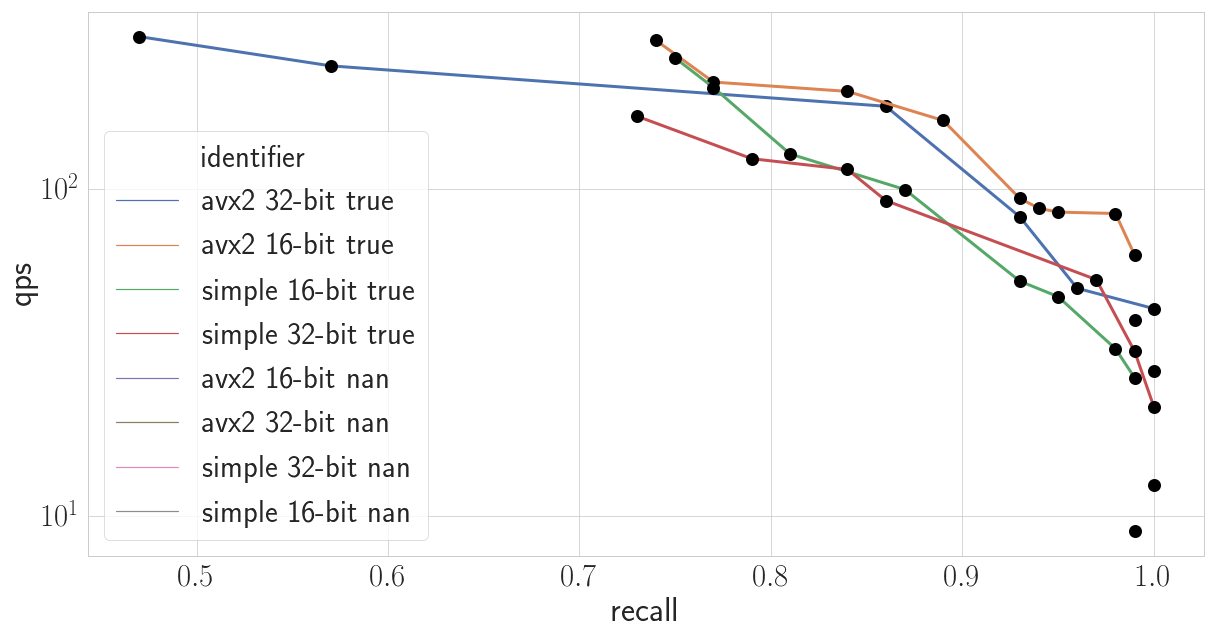

In [20]:
df.replace({"float_aligned" : "32-bit", "i16_aligned" : "16-bit"}, inplace=True,regex=True)
df["qps"] = df.apply(lambda row: 1 / ((row["running_time_ns"] / 100.0) / 1e9), axis=1 )
df["identifier"] = df.apply(lambda row: row["method"] + " " + row["storage"] + " " + str(row["filter"]), axis=1)


g = sns.lineplot(data=get_pareto_frontier(df, 'recall', 'qps', 'identifier'), x='recall', y='qps', hue='identifier', markers=True, dashes=False,
                 marker='o', ms=10, mew=3, lw=3, color='black', markeredgecolor='black', markerfacecolor="black", legend="full", err_style=None)
g.semilogy()

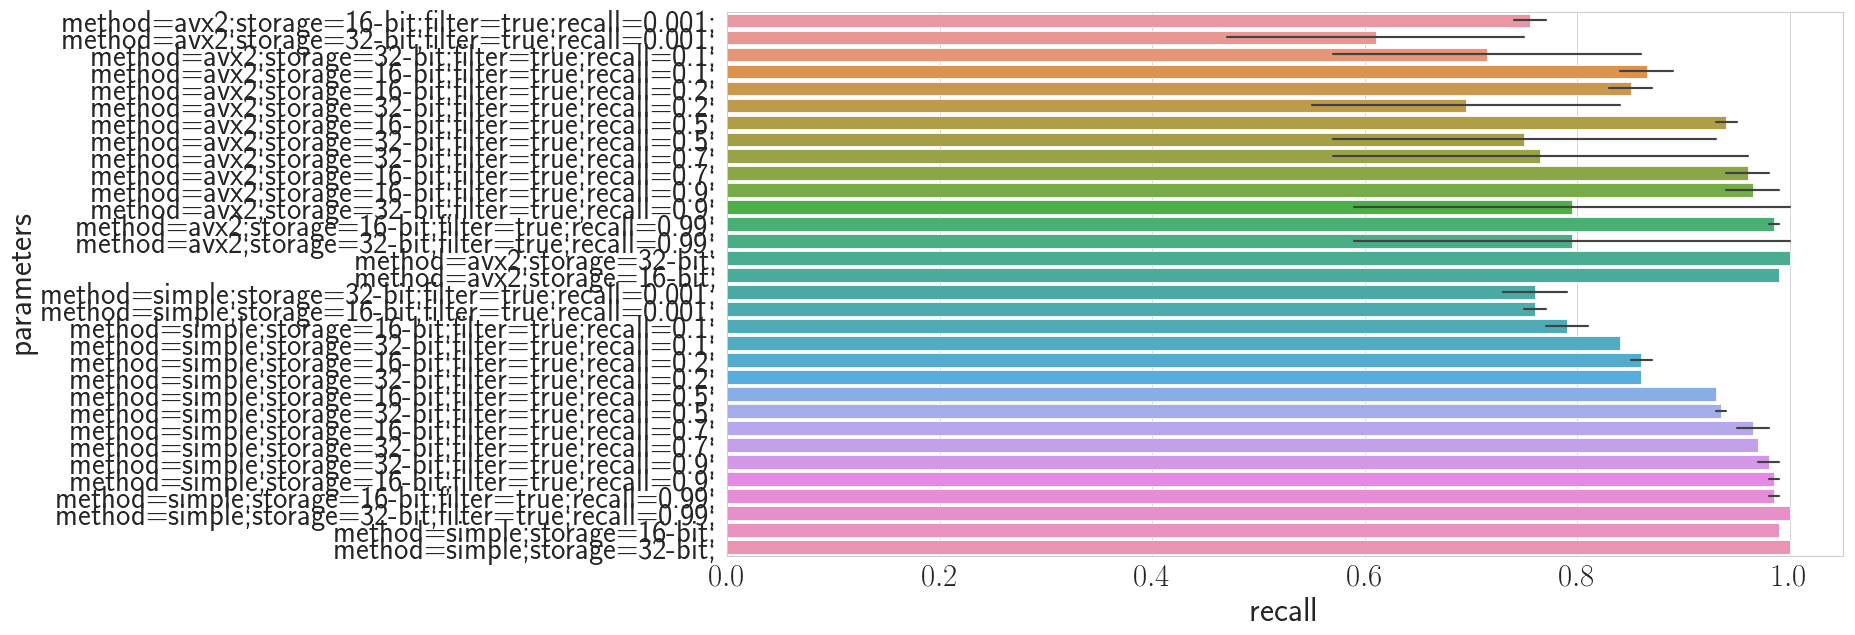

In [21]:
sns.barplot(data=df.sort_values(['method', 'recall_wish']), y='parameters', x='recall')

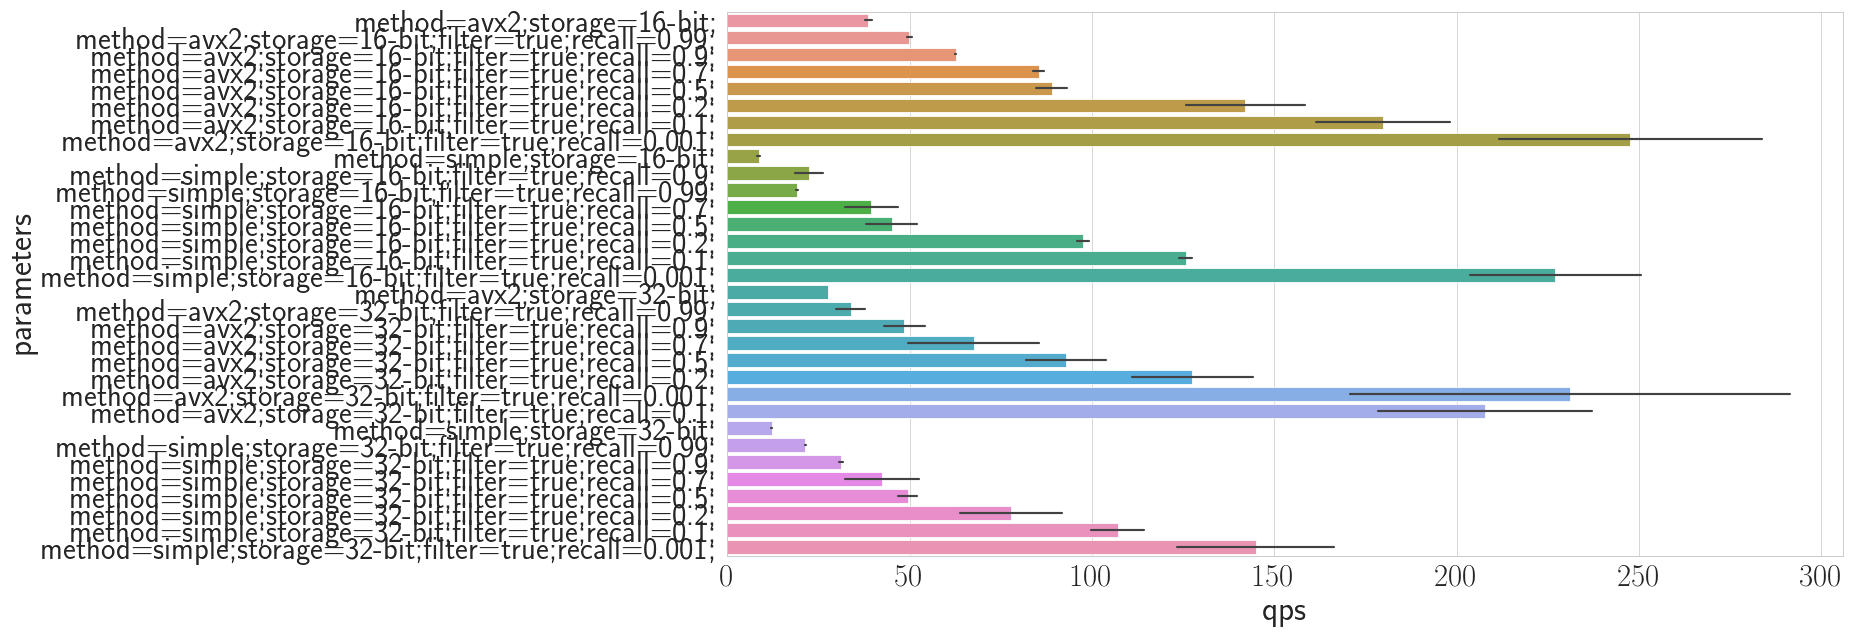

In [22]:
sns.barplot(data=df.sort_values(['storage', 'method', 'qps']), y='parameters', x='qps')

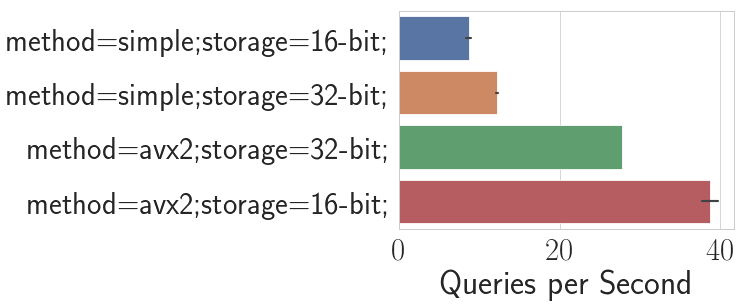

In [9]:
sns.barplot(data=df[~df.parameters.str.contains("recall")].sort_values(['qps']), y='parameters', x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("linearscan_no_filter.png", bboxes='tight')

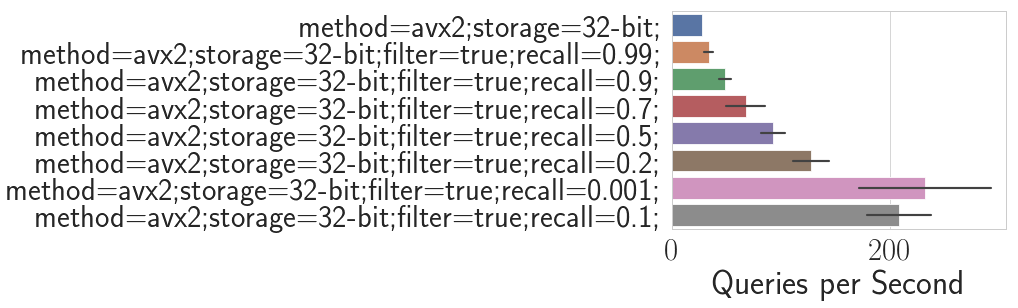

In [10]:
sns.barplot(data=df[(df.parameters.str.contains("32-bit")) & (df.parameters.str.contains("avx2"))].sort_values(['qps']), y='parameters', x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("32bit_filter.png", bboxes='tight')

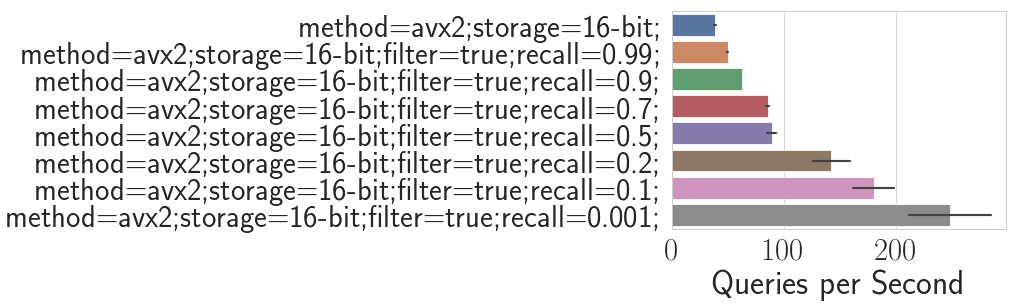

In [11]:
sns.barplot(data=df[(df.parameters.str.contains("16-bit")) & (df.parameters.str.contains("avx2"))].sort_values(['qps']), y='parameters'
, x='qps')
plt.ylabel("")
plt.xlabel("Queries per Second")
plt.savefig("16bit_filter.png", bboxes='tight')

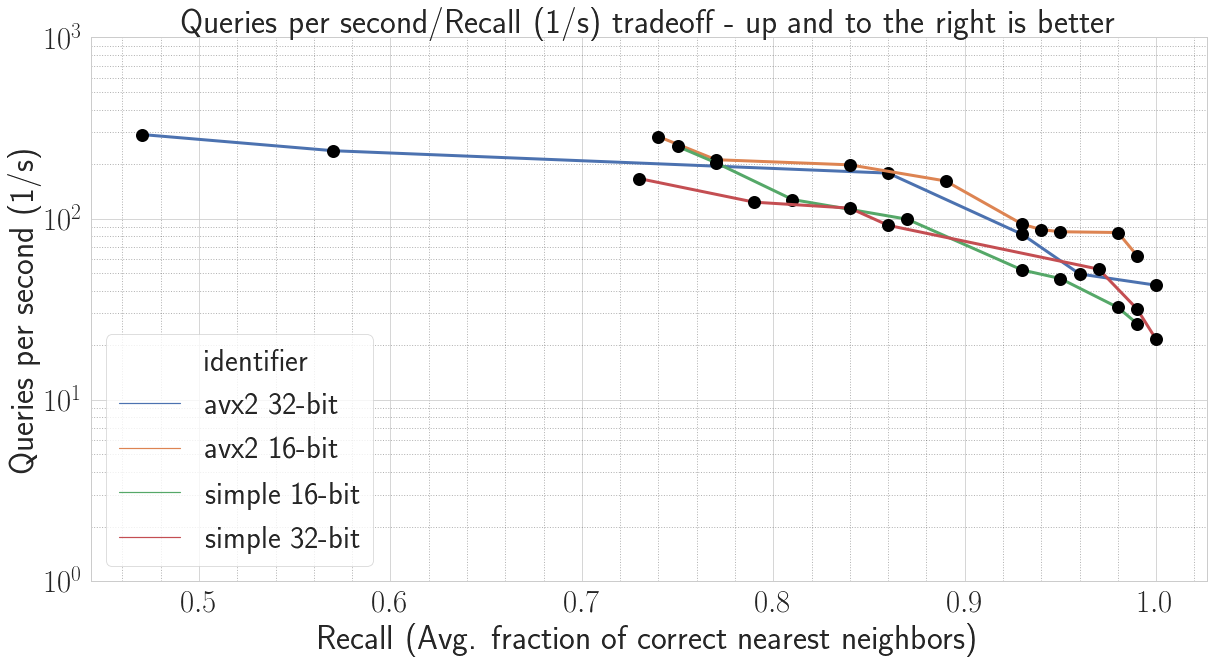

In [23]:
plot_df = get_pareto_frontier(df, 'recall', 'qps', 'identifier')
plot_df = plot_df[~plot_df.parameters.str.contains("avx512") & (plot_df["filter"].notnull())]
plot_df.replace({" true" : ""}, inplace=True, regex=True)
ax = sns.lineplot(data=plot_df, 
                 x='recall', y='qps', hue='identifier', markers=True, dashes=False,
                 marker='o', ms=10, mew=3, lw=3, color='black', markeredgecolor='black', 
                 markerfacecolor="black", legend="full", err_style=None)

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=1, alpha=.3, color='black')
ax.semilogy()
ax.set(ylim=(1,1000))
plt.title("Queries per second/Recall (1/s) tradeoff - up and to the right is better")
plt.ylabel("Queries per second (1/s)")
plt.xlabel("Recall (Avg. fraction of correct nearest neighbors)")
plt.savefig('avx2_16vs32bit.png', bboxes='tight')